In [1]:
#installing sklearn 1.4.2

!pip install scikit-learn==1.4.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")


In [4]:
ppdd.shape

(1503, 11)

In [5]:
ppdd.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [6]:
ppdd.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [7]:
ppdd.drop('Timestamp', axis=1, inplace=True)
ppdd =ppdd.dropna(axis=0)
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
print(ppdd['irritable_towards_baby_and_partner'].unique())#4
print(ppdd['trouble_sleeping_at_night'].unique())
print(ppdd['problems_concentrating_or_making_decision'].unique())#3
print(ppdd['overeating_or_loss_of_appetite'].unique())
print(ppdd['feeling_anxious'].unique())
print(ppdd['age'].unique()) #1
print(ppdd['problems_of_bonding_with_baby'].unique())#2
print(ppdd['suicide_attempt'].unique()) #5
print(ppdd['feeling_of_guilt'].unique())
print(ppdd['feeling_sad_or_tearful'].unique())

['Yes' 'No' 'Sometimes']
['Two or more days a week' 'No' 'Yes']
['Yes' 'No' 'Often']
['Yes' 'No' 'Not at all']
['Yes' 'No']
['35-40' '40-45' '30-35' '45-50' '25-30']
['Yes' 'Sometimes' 'No']
['Yes' 'No' 'Not interested to say']
['No' 'Yes' 'Maybe']
['Yes' 'No' 'Sometimes']


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [10]:
print(ppdd['irritable_towards_baby_and_partner'].unique()) #4
print(ppdd['trouble_sleeping_at_night'].unique())
print(ppdd['problems_concentrating_or_making_decision'].unique())#3
print(ppdd['overeating_or_loss_of_appetite'].unique())
print(ppdd['feeling_anxious'].unique())
print(ppdd['age'].unique())#1
print(ppdd['problems_of_bonding_with_baby'].unique())#2
print(ppdd['suicide_attempt'].unique())#5
print(ppdd['feeling_of_guilt'].unique())
print(ppdd['feeling_sad_or_tearful'].unique())

[2 0 1]
[1 0 2]
[2 0 1]
[2 0 1]
[1 0]
[2 3 1 4 0]
[2 1 0]
[2 0 1]
[1 2 0]
[2 0 1]


In [11]:
ppdd.columns

Index(['age', 'feeling_sad_or_tearful', 'irritable_towards_baby_and_partner',
       'trouble_sleeping_at_night',
       'problems_concentrating_or_making_decision',
       'overeating_or_loss_of_appetite', 'feeling_anxious', 'feeling_of_guilt',
       'problems_of_bonding_with_baby', 'suicide_attempt'],
      dtype='object')

In [12]:
corr=ppdd.corr()
corr_feeling_anxious = corr['feeling_anxious']

# Sort the correlation values in descending order
sorted_corr = corr_feeling_anxious.sort_values(ascending=False)

# Get the top correlated features
top_corr_features = sorted_corr.index[1:6]  # Exclude the first index because it's 'Feeling anxious' itself

top_corr_features

Index(['problems_of_bonding_with_baby',
       'problems_concentrating_or_making_decision', 'age',
       'irritable_towards_baby_and_partner', 'suicide_attempt'],
      dtype='object')

In [13]:
# prompt: install sklearn 1.4.2

# !pip install scikit-learn==1.4.2


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [15]:
y = ppdd.feeling_anxious

ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   problems_of_bonding_with_baby              1192 non-null   int64
 1   problems_concentrating_or_making_decision  1192 non-null   int64
 2   age                                        1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [16]:
print(X_test.shape)

(299, 5)


## MODEL TRAINING

### Multilayered stacking using logistic regression
* Accuracy: 0.9498327759197325
* precision: 0.9748743718592965
* recall: 0.9509803921568627
* f1_score: 0.9627791563275434

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Assuming you have your data loaded and preprocessed as X and y

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier(max_depth=5, ccp_alpha=0.001, random_state=42)),
    ('knn', KNeighborsClassifier(algorithm='auto', n_neighbors=9, p=2, weights='distance')),
    ('svm', SVC(random_state=42)),
    ('rf', RandomForestClassifier(max_depth=15, n_estimators=60, random_state=42))
]

# Meta classifiers layer 1
meta_classifiers_layer1 = [
    ('xgboost', XGBClassifier()),
    ('svm', SVC( kernel='rbf', random_state=42, C=1, gamma=0.1)),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50),activation='relu', max_iter=500, random_state=42)),
]

# Meta classifier layer 2
meta_classifier_layer2 = LogisticRegression(C=0.01, penalty='l1', solver='saga')

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=StackingClassifier(estimators=meta_classifiers_layer1, final_estimator=meta_classifier_layer2 ),
)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(ccp_alpha=0.001,
                                                       max_depth=5,
                                                       random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=9,
                                                     weights='distance')),
                               ('svm', SVC(random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=15,
                                                       n_estimators=60,
                                                       random_state=42))],
                   final_estimator=StackingClassifier(estimators=[('xgboost',
                                                                   XGBClassifier(bas...
                                                                                 min_child_weight=None,
                                                                                 missing=nan,
                                                                                 monotone_constraints=None,
                                                                                 multi_strategy=None,
                                                                                 n_estimators=None,
                                                                                 n_jobs=None,
                                                                                 num_parallel_tree=None,
                                                                                 random_state=None, ...)),
                                                                  ('svm',
                                                                   SVC(C=1,
                                                                       gamma=0.1,
                                                                       random_state=42)),
                                                                  ('nn',
                                                                   MLPClassifier(hidden_layer_sizes=(100,
                                                                                                     50),
                                                                                 max_iter=500,
                                                                                 random_state=42))],
                                                      final_estimator=LogisticRegression(C=0.01,
                                                                                         penalty='l1',
                                                                                         solver='saga')))

In [21]:
# Predicting the test set
y_pred_stacking = stacking_clf.predict(X_test)

In [22]:
stacking_clf.score(X_train, y_train)

0.9337248322147651

In [23]:
stacking_clf.score(X_test, y_test)

0.9498327759197325

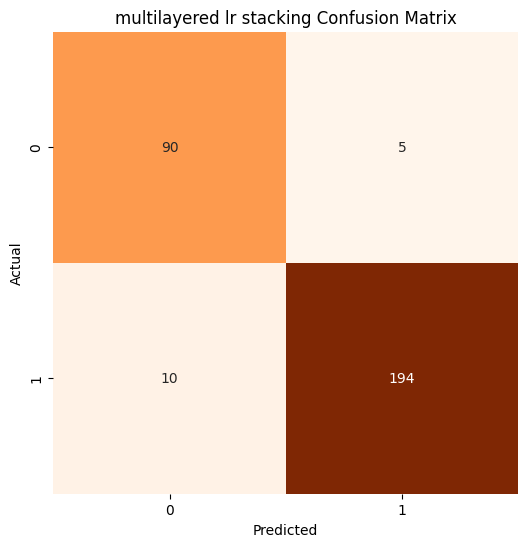

evalution metrics for multilayered lr stacking classifier
Accuracy: 0.9498327759197325
precision: 0.9748743718592965
recall: 0.9509803921568627
f1_score: 0.9627791563275434


In [24]:
# Evaluating the model
cm_stacking =confusion_matrix(y_test, stacking_clf.predict(X_test))
plt.figure(figsize=(6,6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('multilayered lr stacking Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("evalution metrics for multilayered lr stacking classifier")
print("Accuracy:", metrics.accuracy_score(y_test, stacking_clf.predict(X_test)))
print("precision:", metrics.precision_score(y_test, stacking_clf.predict(X_test)))
print("recall:", metrics.recall_score(y_test, stacking_clf.predict(X_test)))
print("f1_score:", metrics.f1_score(y_test, stacking_clf.predict(X_test)))

In [25]:
import pickle

In [26]:
pickle.dump(stacking_clf, open('stacking_clf.sav', 'wb'))